# Computer Science and Data Analytic's
## Machine Learning and Statistics 2021
## Project 2021 - Scipy-Stats
### By: Keith Brazill - G00387845

*This assignement is submitted as part of the requirements for partial fullfilment of a postgraduate diploma in Computer Science with Data Analytics at Galway Mayo Institute of Technology.*

![alt text.](https://learnonline.gmit.ie/pluginfile.php/1/theme_adaptable/logo/1606983803/Transparent%20new.png "GMIT Logo")

This notebook is prepared in response to the brief assigned for the project 2021 in the module of Machine Learning and Statistics as part of the postgraduate diploma in Computer Science with Data Analytics at Galway Mayo Institute of Technology.

This notebook is structured as follow's:

- Introduction
- The Project Brief
- Overview of Scipy Stats
- Hypothesis Testing using Anova with Scipy Stats
- References

Throughout the notebook each of the above sections is cleary explained using a combination of code and markdown cells.

**Packages used in this project**

The following python packages were used in this assignment to carry out the required the project brief:

- Python https://www.python.org/downloads/
- Numpy http://www.numpy.org/ - The fundamental package for scientific computing with Python.
- Jupyter Notebook https://jupyter.org/ - Project Jupyter exists to develop open-source software, open-standards, and services for interactive computing across dozens of programming languages.
- matplotlib.pyplot https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.html - matplotlib.pyplot is a state-based interface to matplotlib. It provides a MATLAB-like way of plotting. pyplot is mainly intended for interactive plots and simple cases of programmatic plot generation.
- seaborn https://seaborn.pydata.org/ - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
- pandas https://pandas.pydata.org/ - pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
- Scikit Learn - The most widely used pyhton machine learning package available at: https://scikit-learn.org/stable/index.html.
- Scipy Stats - Is a third-party library for scientific computing based on NumPy. It offers additional functionality compared to NumPy, including scipy.stats for statistical analysis.Documentation available at: https://docs.scipy.org/doc/scipy/reference/stats.html


# 2. The Project Brief

**Scipy Stats Jupyter Notebook**
- Include a Jupyter notebook called scipy-stats.ipynb that contains the following:
    - A clear and concise overview of the scipy.stats Python library
    - An example hypothesis test using ANOVA. You should find a data set on which it is appropriate to use ANOVA, ensure the assumptions underlying ANOVA are met, and then perform and display the results of your ANOVA using scipy.stats.
    - Appropriate plots and other visualisations to enhance your notebook for viewers.

# 3 Overview of Scipy Stats in Python

## What is Scipy

Scipy is an open source python library used to solve a range of numerous scientific and mathemical problems. Scipy is built on top of numpy and it allows Data Scientists to manipulate and visualise data with a wide range of functions and in built libraries. 

Within Scipy there are numerous subpackackages for various different applications, a summary of some of the main ones is provided below:

- cluster:	Clustering algorithms
- constants:	Physical and mathematical constants
- fftpack:	Fast Fourier Transform routines
- integrate:	Integration and ordinary differential equation solvers
- interpolate:	Interpolation and smoothing splines
- io:	Input and Output
- linalg:	Linear algebra
- ndimage:	N-dimensional image processing
- odr:	Orthogonal distance regression
- optimize:	Optimization and root-finding routines
- signal:	Signal processing
- sparse:	Sparse matrices and associated routines
- spatial:	Spatial data structures and algorithms
- special:	Special functions
- stats:	Statistical distributions and functions

For a detailed description of all subpackages refer to the full Scipy documentations provided in references.

## Scipy Stats

The Scipy Stats module is a significant tool for assessing the randomness of data. For example, if we computed the probability of coin tossing e.g. producing at least 16 heads after twenty coins flips, our manual calculations would require us to examine all scenarios for twenty flipped coins. This can be done instantly with Stats. To demonstrate the power and utilisation of the Scipy Stats package we will simulate coin flipping and probability calculations in following code. 


## Examples of Scipy Stats in Python

To understand the application of Scipy Stats particularly in python it is best explained using some example code. Scipy can be installed in the command line using `pip install scipy`. Once installed we are going to import the stats module of Scipy using following code:

In [1]:
from scipy import stats

For our fist example lets use the stats.binomial test method. The method is called after the binomial distribution which determines how a flipped coins may land. There are 3 parameters required:
    - the number of heads
    - the number of flips, and,
    - the probability of a coin landing on heads.

In [2]:
num_heads = 16
num_tosses = 20
prob_head = 0.5 # 2 sides to coins so 50% chance
prob = stats.binom_test(num_heads, num_tosses, prob_head)
print(f"Probability of observing more than 15 heads or 15 tails is {prob:.17f}")


Probability of observing more than 15 heads or 15 tails is 0.01181793212890625


It is important to note that stats.binomial_test did not compute the probability of observing sixteen heads, but rather it returned the probability of seeing a coin flip sequence where sixteen coins or more fell on the same face. To calcualte probability of getting exactly 16 heads we must use stats.binom.pmf method. PMF stands for "probability mass function" of the binomial distribution. This function maps inputted integer values to their probability of occuring. We will calculate this using below code:

In [3]:
prob_16_heads = stats.binom.pmf(num_heads, num_tosses, prob_head)
print(f"The probability of seeing {num_heads} of {num_tosses} heads is {prob_16_heads}")

The probability of seeing 16 of 20 heads is 0.004620552062988271


We can see the probability of seeing exactly 16 heads is much lower. Now lets go a step further. Using Scipy-Stats we can calcualte multiple probabilities simultaneously. Using multiple head-count we can pass in a number of probabilities. For example [4, 16] will return a two element Numpy array containting the probability of seeing fOUR heads and 16 heads. 

In [4]:
prob_simult = stats.binom.pmf([4,16], num_tosses, prob_head)
assert prob_simult.tolist() == [prob_16_heads] * 2

Passing via a list allows us to determine probabilities across intervals such as pass range(21) into stats.binom.pmf then the array will contain all probabilities across the total number of every head count from above. The sum of probabilities should therefore equal 1.0.

In [5]:
interval_all_counts = range(21)
prob_simult = stats.binom.pmf(interval_all_counts, num_tosses, prob_head)
total_prob = prob_simult.sum()
print(f"total sum of probabilities equals {total_prob:.14f}")


total sum of probabilities equals 1.00000000000000


Plotting interval_all_counts vs probabilties will give us a shap to our twenty coin flip distribution. We can generate this plot by importing matplotlib.pyplot.

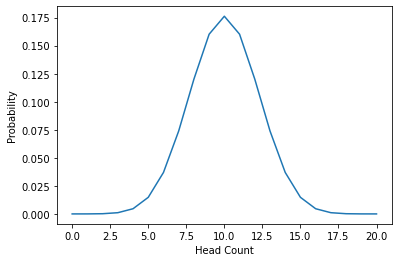

In [6]:
import matplotlib.pyplot as plt
plt.plot(interval_all_counts, prob_simult)
plt.xlabel('Head Count')
plt.ylabel('Probability')
plt.show()

The stats.binom.pmf allows us to display and distribution associated with a flip coin, we can plot multiple flips togehter in one graph, for example 20, 50, 150, 200:

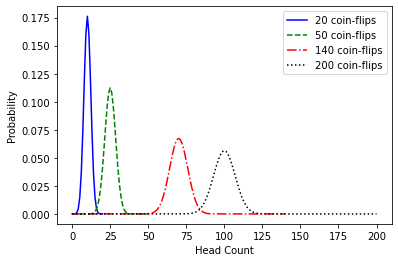

In [7]:
flip_counts = [20, 50, 140, 200] #sets counts
linestyles = ['-','--', '-.', ':'] #sets unique linestyle for each plot
colors = ['b', 'g', 'r', 'k'] # sets unique color for each plot

for num_tosses, linestyle, color in zip (flip_counts, linestyles, colors):
    x_values = range(num_tosses + 1)
    y_values = stats.binom.pmf(x_values, num_tosses, 0.5)
    plt.plot(x_values, y_values, linestyle=linestyle, color=color, label=f'{num_tosses} coin-flips')

plt.legend()
plt.xlabel('Head Count')
plt.ylabel('Probability')
plt.show()


The peak of each binomial shits to the right as the coin toss increases. It is also noted how thinner the smaller coin toss numbers are compared to the higher number. 

Having reviewed the Scipy stats package using above examples and explanations we are now going to move to the next stage of our notebook which is hypthesis testing using Anova.

# 4 Anova Hypothesis Testing

For our anova (analysis of variance) hypothesis test we are can to use a sub package called one way Anova (https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html). One way Avova is used to determine if there are statistically significant differences between the means of three or more independent groups. 

## One Way Anova in Python

For our example we will demonstrate how a one way anova hypothesis can be tested in python. Our assumed scenarioo will be that a researcher will request 30 of their students to participate in learning project where each of the students will be randomly assigned a study technique to use for an upcoming exam. The students will have a number of weeks to prepare and at the end of the three weeks will sit the test. We will generate random test scores for the three groups using numpy.linspace.

In [8]:
import numpy as np 

n = 10 # number of results per group
a = np.linspace(80,92, n) # creates an array evenly spaced between numbers for n
b = a -5 
c = (a+b) / 2

print("group a test results are", a)
print("group b test results are", b)
print("group c test results are", c)

group a test results are [80.         81.33333333 82.66666667 84.         85.33333333 86.66666667
 88.         89.33333333 90.66666667 92.        ]
group b test results are [75.         76.33333333 77.66666667 79.         80.33333333 81.66666667
 83.         84.33333333 85.66666667 87.        ]
group c test results are [77.5        78.83333333 80.16666667 81.5        82.83333333 84.16666667
 85.5        86.83333333 88.16666667 89.5       ]


Next we can use the f_oneway package fromt the scipy stats library to carry out the f one way calculation to the generate the F statistic and P-Value. 

In [9]:
from scipy.stats import f_oneway

F, p = f_oneway(a, b, c)

print("statistic F is", F)
print("P-Value is", p)

statistic F is 3.8352272727272716
P-Value is 0.03419456529100415


## Interpreting the Results

The F test statistic is 3.8352272727272716 and the corresponding p-value is 0.03419456529100415. The F-statistic is the ratio of the mean squares treatment to the means squares error or another way of saying this is that it is the variation between sample means divivded by variation within samples. The larger the F-statistic the greater the variation between the samples.

To determine if there is a statistically significant difference between the groups we can look at the F-statistics corresponding p-value. This is automatically calculated using scipy stats f_oneway. If the p-value is less than α = .05, we reject the null hypothesis of the anova and can conclude that there is a significantly statistic difference between the mean of the three groups. In our particular example the p-value is less than 0.05 so there is a significant statistical difference between the three mean our sufficient evidence for us to say there is a statistical difference. 

Lets run one more example for where we would fail to reject the null hypothesis:

In [10]:
n = 10 # number of results per group
a1 = np.linspace(80,92, n) # creates an array evenly spaced between numbers for n
b1 = a1 -1
c1 = b1 -2

print("group a1 test results are", a1)
print("group b1 test results are", b1)
print("group c1 test results are", c1)

group a1 test results are [80.         81.33333333 82.66666667 84.         85.33333333 86.66666667
 88.         89.33333333 90.66666667 92.        ]
group b1 test results are [79.         80.33333333 81.66666667 83.         84.33333333 85.66666667
 87.         88.33333333 89.66666667 91.        ]
group c1 test results are [77.         78.33333333 79.66666667 81.         82.33333333 83.66666667
 85.         86.33333333 87.66666667 89.        ]


In [11]:
F1, p1 = f_oneway(a1, b1, c1)

print("statistic F is", round(F1,5))
print("P-Value is", round(p1,8))

statistic F is 1.43182
P-Value is 0.25643926


In the above example we put little difference between the three groups and got a closer to 1 F statistic 1.43182. The p-value 0.25643926 is also greater than α = .05 so we would fail to reject the null hypothesis. This means we do not have enough evidence to say that there is a statistically significant difference between the group means.

# 5 References

1. Docs.scipy.org. 2021. Statistical functions (scipy.stats) — SciPy v1.7.1 Manual. [online] Available at: <https://docs.scipy.org/doc/scipy/reference/stats.html> [Accessed 16 December 2021].
2. Docs.scipy.org. 2021. Statistical functions (scipy.stats) — SciPy v1.7.1 Manual. [online] Available at: <https://docs.scipy.org/doc/scipy/reference/stats.html> [Accessed 16 December 2021].
3. Urooj, W., 2021. SciPy Tutorial | Beginners Guide to Python SciPy with Examples | Edureka. [online] Edureka. Available at: <https://www.edureka.co/blog/scipy-tutorial/> [Accessed 16 December 2021].
4. Manning. 2021. Basic Probability and Statistical Analysis Using SciPy - Manning. [online] Available at: <https://freecontent.manning.com/basic-probability-and-statistical-analysis-using-scipy/> [Accessed 16 December 2021].
5. Zach, V., 2021. How to Perform a One-Way ANOVA in Python - Statology. [online] Statology. Available at: <https://www.statology.org/one-way-anova-python/> [Accessed 16 December 2021].
6. Docs.scipy.org. 2021. scipy.stats.f_oneway — SciPy v1.7.1 Manual. [online] Available at: <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html> [Accessed 16 December 2021].
7. Statistics.laerd.com. 2021. One-way ANOVA - Violations to the assumptions of this test and how to report the results | Laerd Statistics. [online] Available at: <https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide-3.php> [Accessed 16 December 2021].
8. Zach, V., 2021. How to Interpret the F-Value and P-Value in ANOVA - Statology. [online] Statology. Available at: <https://www.statology.org/anova-f-value-p-value/> [Accessed 16 December 2021].
9. Docs.scipy.org. 2021. scipy.stats.f_oneway — SciPy v1.7.1 Manual. [online] Available at: <https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html> [Accessed 16 December 2021].
10. Marsja.se. 2021. [online] Available at: <https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/> [Accessed 16 December 2021].
